<a href="https://colab.research.google.com/github/Shahzodgithub/tashkent_house_price_prediction/blob/main/Copy_of_Copy_of_05_ml_05_amaliyot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000
...,...,...,...,...,...,...,...
7560,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38,5,5,24500
7561,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,49,1,4,32000
7562,"город Ташкент, Шайхантахурский район, Зульфиях...",Шайхантахурский,2,64,3,9,40000
7563,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,1,18,1,4,11000


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

**Supervised learning** - sababi bizda ma'lumotlarda label (yorliq) mavjud. Bu hududdadi median narx. Biz ham aynan shu narxni bashorat qilmoqchimiz.
**Regressiya** - "Bashorat" (prognoz) dedikmi demak bu regressia algoritmlari yordamida hal qilinadi.
**Offline ** - sababi ma'lumotlar bizga avvaldan bir marta berilgan. Doimiy ma'lumotlar oqimi yo'q.

Model aniqligini baholash uchun Root Mean Square Error - RMSE dan foydalanamiz

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


Xulosalar infodan:


1.   Hamma ustunlarda bir xil sonda (7565 ta) null bo'lmagan qiymatlar bor
2.   4 ta ustun qiymatlari object tipida



**Price va size larni number tipiga o'tkazib oldik**

In [5]:
df['price'] = pd.to_numeric(df['price'],errors='coerce')
df['price'].dtype
df['size'] = pd.to_numeric(df['size'],errors='coerce')
df['size'].dtype

dtype('float64')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7565 non-null   object 
 1   district    7565 non-null   object 
 2   rooms       7565 non-null   int64  
 3   size        7564 non-null   float64
 4   level       7565 non-null   int64  
 5   max_levels  7565 non-null   int64  
 6   price       7466 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 413.8+ KB


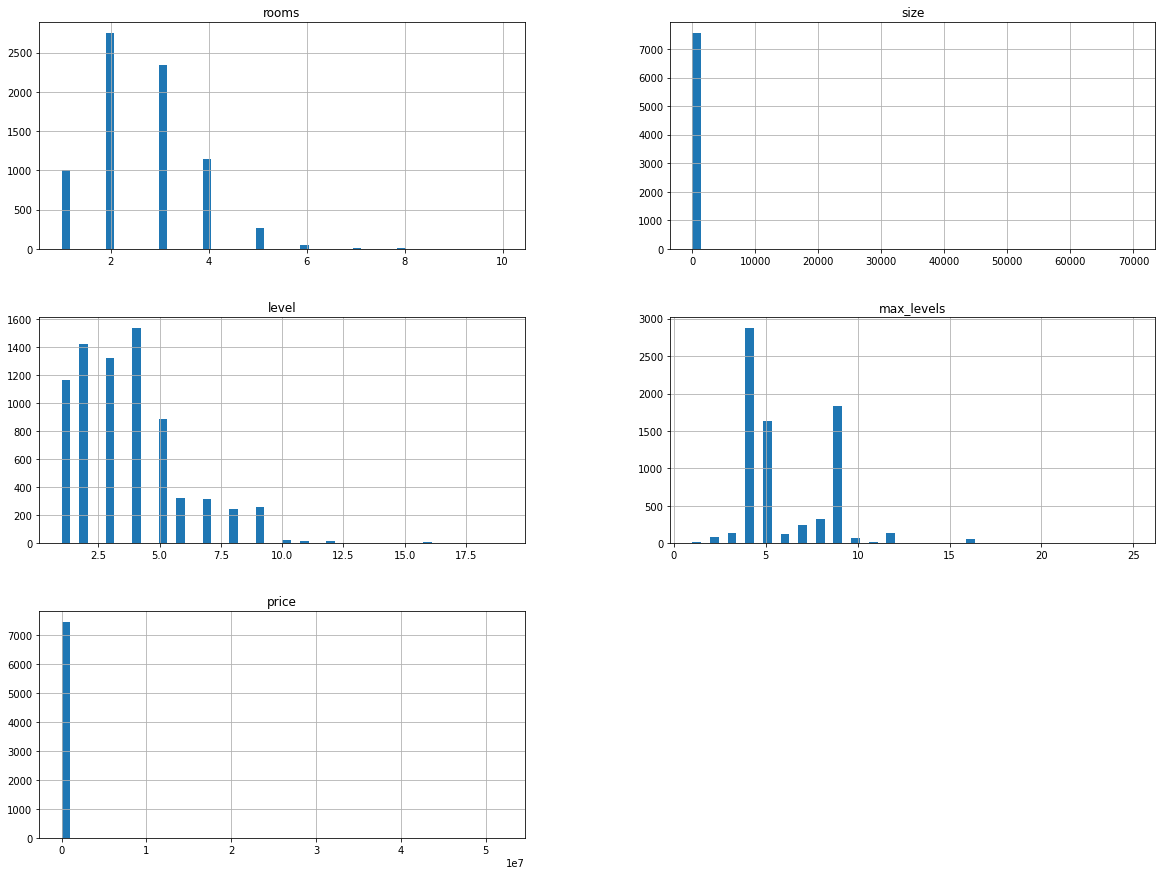

In [7]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [9]:
train_set

,location,district,rooms,size,level,max_levels,price
4552,"город Ташкент, Учтепинский район, Чиланзар ква...",Учтепинский,2,52.0,3,4,37000.0
4450,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,4,187.0,2,5,210000.0
1656,"город Ташкент, Яккасарайский район, Кушбеги",Яккасарайский,1,39.0,2,5,27500.0
3570,"город Ташкент, Юнусабадский район, Юнусабад 6-...",Юнусабадский,2,74.0,3,6,46835.0
6618,"город Ташкент, Шайхантахурский район, Беруни",Шайхантахурский,4,165.0,4,7,140000.0
...,...,...,...,...,...,...,...
5191,"город Ташкент, Юнусабадский район, Юнусабад 11...",Юнусабадский,3,70.0,4,4,43500.0
5226,"город Ташкент, Чиланзарский район, Чиланзар кв...",Чиланзарский,4,92.0,9,9,56000.0
5390,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,49.0,1,3,58500.0
860,"город Ташкент, Шайхантахурский район, Лабзак",Шайхантахурский,2,60.0,3,4,53000.0


In [10]:
test_set

,location,district,rooms,size,level,max_levels,price
132,"город Ташкент, Чиланзарский район, Чиланзар 6-...",Чиланзарский,2,37.0,1,4,41000.0
3771,"город Ташкент, Сергелийский район, Сергели-I Я...",Сергелийский,1,39.0,5,5,21000.0
65,"город Ташкент, Учтепинский район, Чиланзар 15-...",Учтепинский,4,110.0,3,3,91000.0
7525,"город Ташкент, Шайхантахурский район, Алишера ...",Шайхантахурский,4,84.0,2,4,95000.0
6791,"город Ташкент, Мирабадский район, Чимкент",Мирабадский,4,100.0,3,4,88000.0
...,...,...,...,...,...,...,...
4834,"город Ташкент, Чиланзарский район, Чиланзар-9",Чиланзарский,2,50.0,2,5,36000.0
3125,"город Ташкент, Мирзо-Улугбекский район, ц-1 Бу...",Мирзо-Улугбекский,4,92.0,4,4,130000.0
347,"город Ташкент, Яшнободский район, Фергана Йули",Яшнободский,2,59.0,4,4,26500.0
6678,"город Ташкент, Сергелийский район, Массив серг...",Сергелийский,3,57.0,3,7,43000.0


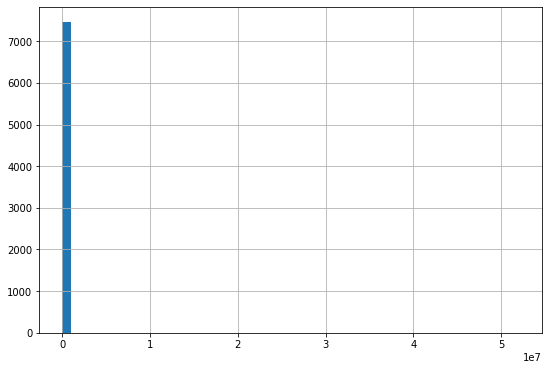

In [11]:
%matplotlib inline
df['price'].hist(bins=50, figsize=(9,6))
plt.show()

In [12]:
housing = train_set.copy()

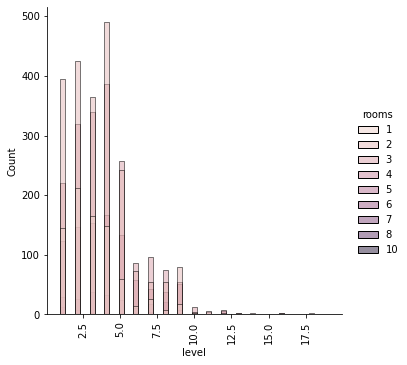

In [26]:
sns.displot(data=housing,x="level", hue='rooms')
plt.xticks(rotation=90)
plt.show()

**Narx va qolgan ko'rsatkichlar o'rtasidagi bog'liqlik**

In [14]:
housing.corrwith(housing['price']).sort_values(ascending=False)

price         1.000000
rooms         0.053628
max_levels    0.011113
size          0.001556
level        -0.003067
dtype: float64

Faqatgina rooms va max_levels bilan kichik bo'lsa ham korrelatsiya bor ekan

***Yangi parametrlar yaratamiz***

In [15]:
housing['size_per_room'] = housing['rooms']/housing['size']

In [16]:
housing.corrwith(housing['price']).sort_values(ascending=False)

price            1.000000
rooms            0.053628
max_levels       0.011113
size             0.001556
size_per_room    0.000135
level           -0.003067
dtype: float64

Ko'rishimiz mumkinki baribir bu ko'rsatkichlar o'rtasida korrelatsiya juda kichik

In [17]:
housing = train_set.drop("price", axis=1)
housing_labels = train_set["price"].copy()
housing.drop(['location', 'district'], axis=1, inplace=True)

In [18]:
# SimpleImputer klassini chaqiramiz
from sklearn.impute import SimpleImputer
# SimpleImputer klassidan yangi obyekt yaratamiz va NaN qiymatlarni median qiymat bilan to'ldirishni ko'rsatamiz
imputer = SimpleImputer(strategy="median")

In [19]:
imputer.fit(housing)

SimpleImputer(strategy='median')

In [20]:
imputer.statistics_

array([ 3., 66.,  3.,  5.])

In [21]:
from sklearn.preprocessing import MinMaxScaler
min_mix_scaler = MinMaxScaler()

min_mix_scaler.fit_transform(housing)

array([[0.11111111, 0.00072858, 0.11111111, 0.125     ],
       [0.33333333, 0.00265718, 0.05555556, 0.16666667],
       [0.        , 0.00054286, 0.05555556, 0.16666667],
       ...,
       [0.11111111, 0.00068572, 0.        , 0.08333333],
       [0.11111111, 0.00084287, 0.11111111, 0.125     ],
       [0.22222222, 0.00130002, 0.05555556, 0.33333333]])

In [22]:
from sklearn.preprocessing import StandardScaler
standart_scaler = StandardScaler()
standart_scaler.fit_transform(housing)

array([[-0.57746118, -0.03810278, -0.31266907, -0.78950544],
       [ 1.25131698,  0.06792808, -0.75864437, -0.40330378],
       [-1.49185026, -0.04831316, -0.75864437, -0.40330378],
       ...,
       [-0.57746118, -0.04045902, -1.20461968, -1.1757071 ],
       [-0.57746118, -0.03181947, -0.31266907, -0.78950544],
       [ 0.3369279 , -0.00668623, -0.75864437,  1.14150286]])

In [78]:
housing['price'] = housing_labels
housing['price'].fillna(method='ffill', inplace=True)
housing['price'].isnull().sum()

0

In [79]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

X_train = train_set.drop("price", axis=1)
y = train_set["price"].copy()

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_pipeline = Pipeline([
          ('imputer', SimpleImputer(strategy='median')),
          ('std_scaler', StandardScaler())             
])

In [66]:
num_pipeline.fit_transform(housing)

array([[-0.57746118, -0.03810144, -0.31266907, -0.78950544, -0.05011735],
       [ 1.25131698,  0.06793816, -0.75864437, -0.40330378,  0.19616467],
       [-1.49185026, -0.04831267, -0.75864437, -0.40330378, -0.06364151],
       ...,
       [-0.57746118, -0.04045788, -1.20461968, -1.1757071 , -0.01951005],
       [-0.57746118, -0.03181762, -0.31266907, -0.78950544, -0.02733982],
       [ 0.3369279 , -0.0066823 , -0.75864437,  1.14150286, -0.03161061]])

In [81]:
X_prepared = num_pipeline.fit_transform(X_train)

In [82]:
X_prepared

array([[-1.48768281e+00, -4.62620890e-02, -7.56165329e-01,
        -7.84375498e-01],
       [ 3.41596459e-01, -1.28149676e-02, -1.20394470e+00,
        -7.84375498e-01],
       [ 1.25623609e+00,  3.90859304e-03, -7.56165329e-01,
        -3.96949543e-01],
       ...,
       [ 3.41596459e-01, -2.75710506e-02,  5.87172784e-01,
        -3.96949543e-01],
       [-5.73043175e-01, -1.87174008e-02,  6.40830461e+00,
         5.02701383e+00],
       [-5.73043175e-01, -2.85547894e-02, -7.56165329e-01,
        -7.84375498e-01]])

**Linear Regression - Chiziqli regressiya**

In [83]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()

In [84]:
LR_model.fit(X_prepared, y)

LinearRegression()

In [86]:
test_data = X_train.sample(5)
test_data

,rooms,size,level,max_levels
1977,1,26.0,1,3
4364,2,58.0,2,5
4688,2,57.0,2,9
3945,3,80.0,4,4
4026,2,60.0,2,9


In [87]:
test_label = y.loc[test_data.index]
test_label

1977    17000.0
4364    34000.0
4688    40000.0
3945    90000.0
4026    60000.0
Name: price, dtype: float64

In [88]:
test_data_prepared = num_pipeline.transform(test_data)
test_data_prepared

array([[-1.48768281, -0.06396939, -1.2039447 , -1.17180145],
       [-0.57304317, -0.03248974, -0.75616533, -0.39694954],
       [-0.57304317, -0.03347348, -0.75616533,  1.15275428],
       [ 0.34159646, -0.01084749,  0.13939341, -0.7843755 ],
       [-0.57304317, -0.03052227, -0.75616533,  1.15275428]])

In [89]:
predicted_data = LR_model.predict(test_data_prepared)
predicted_data

array([21095.30945864, 57359.78016217, 70884.74263832, 76697.58158388,
       70884.01336509])

In [90]:
pd.DataFrame({'Prognoz':predicted_data, 'Real baxosi': test_label})

,Prognoz,Real baxosi
1977,21095.309459,17000.0
4364,57359.780162,34000.0
4688,70884.742638,40000.0
3945,76697.581584,90000.0
4026,70884.013365,60000.0


In [91]:
X_test = test_set.drop('price', axis=1)
X_test

,rooms,size,level,max_levels
5341,3,65.0,1,2
1834,3,95.0,3,6
1523,1,28.0,3,4
2945,3,80.0,2,8
5925,1,31.0,2,4
...,...,...,...,...
4854,1,36.0,1,4
2140,1,34.0,3,4
7002,2,52.0,4,5
5327,3,70.0,3,5


In [92]:
y_test = test_set['price'].copy()
y_test

5341    48000.0
1834    39000.0
1523    22000.0
2945    86000.0
5925    23000.0
         ...   
4854    26500.0
2140    24500.0
7002    37000.0
5327    51000.0
5670    36200.0
Name: price, Length: 1211, dtype: float64

In [94]:
X_test_prepared = num_pipeline.transform(X_test)

In [95]:
y_predicted = LR_model.predict(X_test_prepared)

# Modelni baholaymiz

In [96]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

447078.0264932269


# DecisionTree

In [97]:
from sklearn.tree import DecisionTreeRegressor
Tree_model = DecisionTreeRegressor()
Tree_model.fit(X_prepared, y)

DecisionTreeRegressor()

In [98]:
y_predicted = Tree_model.predict(X_test_prepared)

In [99]:
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

461104.9580249872


# RandomForest

In [100]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(X_prepared, y)

RandomForestRegressor()

In [101]:
y_predicted = RF_model.predict(X_test_prepared)
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

448769.6687275232
